In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def f1(x1,x2,t):
    return 9*x1 + 24*x2 + 5*np.cos(t) - (1/3)*np.sin(t)

def f2(x1,x2,t):
    return -24*x1 - 51*x2 - 9*np.cos(t) + (1/3)*np.sin(t)

def f(x,t):
    (x1, x2) = x
    return np.array([f1(x1,x2,t),f2(x1,x2,t)])

def true_x1(t):
    return 2*np.exp(-3*t) - np.exp(-39*t) + (1/3)*np.cos(t)

def true_x2(t):
    return -np.exp(-3*t) + 2*np.exp(-39*t) - (1/3)*np.cos(t)

def true_f(t):
    return np.array([true_x1(t),true_x2(t)])

In [4]:
def runge_kutta(f, y0, t0, T, h):
    n = int((T - t0) / h)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(1, n):
        t = t0 + h*i
        k1 = f(y[i-1], t)
        k2 = f(y[i-1] + k1*(h/2), t + h/2)
        k3 = f(y[i-1] + k2*(h/2), t + h/2)
        k4 = f(y[i-1] + k3*h, t + h)
        y[i] = y[i-1] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return y

In [5]:
def adams_bashforth(f, y0, t0, T, h):
    n = int((T - t0) / h)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    y[1] = y0 + h*f(y0, t0)
    y[2] = y[1] + h*f(y[1], t0 + h)
    ts = [t0, t0 + h, t0 + 2*h]
    for i in range(3, n):
        ts.append(t0 + h*i)
        y[i] = y[i-1] + (h/12)*(23*f(y[i-1], ts[i-1]) - 16*f(y[i-2], ts[i-2]) + 5*f(y[i-3], ts[i-3]))
    return y

In [6]:
def implicit_euler(f, y0, t0, T, h):
    n = int((T - t0) / h)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(1, n):
        t = t0 + h*i
        y[i] = y[i-1] + h*f(y[i], t)
    return y

In [7]:
h = [1/10, 1/14]
h = h + [1/(2**k * 15) for k in range(0,5)]
errors_runge_kutta = []
errors_adams_bashforth = []
errors_implicit_euler = []
for i in range(len(h)):
    y = runge_kutta(f, [4/3,2/3], 0, 20, h[i])
    errors_runge_kutta.append(np.abs(y[-1][1] - true_x2(20)))
    errors_adams_bashforth.append(np.abs(adams_bashforth(f, [4/3,2/3], 0, 20, h[i])[-1][1] - true_x2(20)))
    errors_implicit_euler.append(np.abs(implicit_euler(f, [4/3,2/3], 0, 20, h[i])[-1][1] - true_x2(20)))
print(errors_runge_kutta)
print(errors_adams_bashforth)
print(errors_implicit_euler)
    

[2.996376228455167e+129, 2.389538140252786, 0.0004446324043773653, 3.533357504803547e-06, 1.5937288577738684e-07, 8.504624476879385e-09, 4.90125884322623e-10]
[3.094212788350935e+170, 1.4528018674490836e+197, 1.1837330514205628e+202, 4.459640768551589e+219, 2.0101439753438317e+83, 0.002531200731974048, 0.0012667943366324874]
[6.591402301137256, 6.771368032494476, 6.801256179547931, 7.009624332948761, 7.113251430423835, 7.164925751277046, 7.190728105790026]


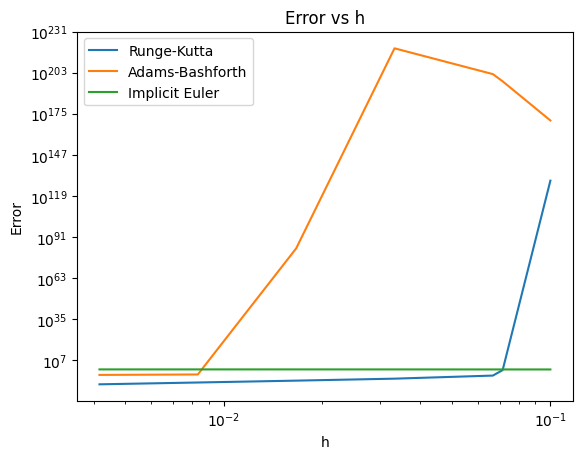

In [8]:
#do a logarithmic graph h vs errors
plt.plot(h, errors_runge_kutta, label='Runge-Kutta')
plt.plot(h, errors_adams_bashforth, label='Adams-Bashforth')
plt.plot(h, errors_implicit_euler, label='Implicit Euler')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('h')
plt.ylabel('Error')
plt.title('Error vs h')
plt.legend()
plt.show()

In [9]:
#Pendulum oscillations
from math import sin, cos

def derivative(u, t):
    u1, u2, u3, u4 = u
    y1 = u3
    y2 = u4
    y3 = (-3*sin(u1) - sin(u1-2*u2) - 2*sin(u1-u2)*(u4**2 + (u3**2)*cos(u1-u2)))/(3 - cos(2*u1-2*u2))
    y4 = (2*sin(u1-u2)*(2*u3**2 + 2*cos(u1) + (u4**2)*cos(u1-u2)))/(3 - cos(2*u1-2*u2))
    
    return np.array([y1, y2, y3, y4])

Text(0.5, 1.0, 'Initialization 1')

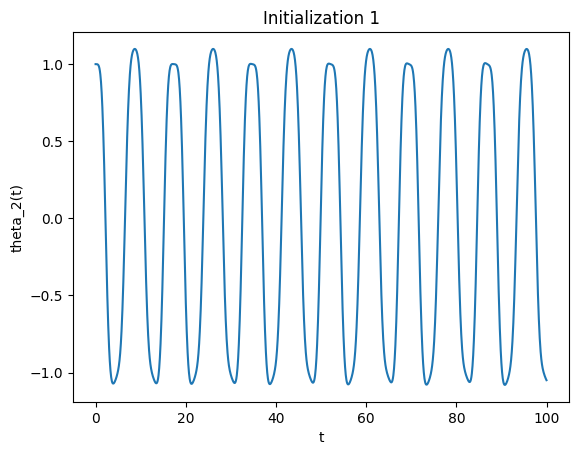

In [10]:
init = [1, 1, 0, 0]
y = runge_kutta(derivative, init, 0, 100, 0.05)
t = np.arange(0, 100, 0.05)

#plot the 1 component of y vs t
plt.plot(t, y[:,1])
plt.xlabel('t')
plt.ylabel('theta_2(t)')
plt.title('Initialization 1')


Text(0.5, 1.0, 'Initialization 2')

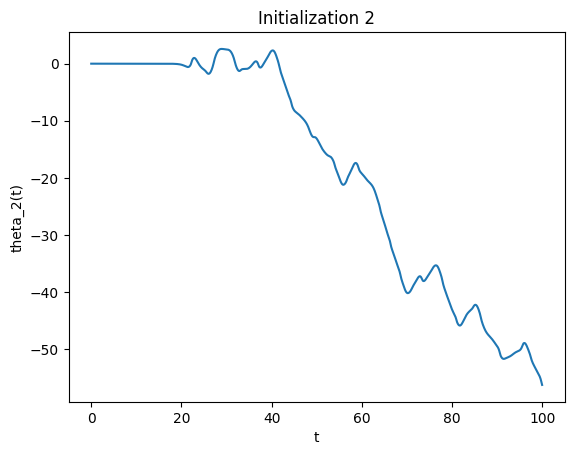

In [11]:
init = [np.pi, 0, 0, 1e-10]
y = runge_kutta(derivative, init, 0, 100, 0.05)
t = np.arange(0, 100, 0.05)

#plot the 1 component of y vs t
plt.plot(t, y[:,1])
plt.xlabel('t')
plt.ylabel('theta_2(t)')
plt.title('Initialization 2')


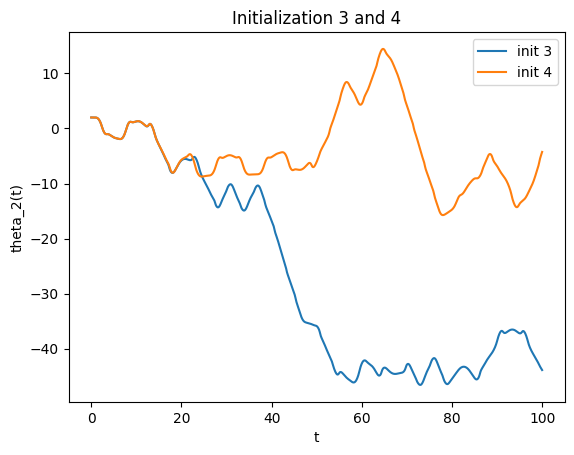

In [12]:
init = [2, 2, 0, 0]
y = runge_kutta(derivative, init, 0, 100, 0.05)
t = np.arange(0, 100, 0.05)

init2 = [2, 2+1e-3, 0, 0]
y2 = runge_kutta(derivative, init2, 0, 100, 0.05)


#plot the 1 component of y vs t
plt.plot(t, y[:,1], label='init 3')
plt.plot(t, y2[:,1], label='init 4')
plt.xlabel('t')
plt.ylabel('theta_2(t)')
plt.title('Initialization 3 and 4')
plt.legend()

In [49]:
init = [1, 1, 0, 0]
h = np.sort([0.01] + [0.05/(2**k) for k in range(1,5)])
h = [0.05/(2**0), 0.05/(2**1), 0.05/(2**2), 0.05/(2**3), 0.05/(2**4), 0.001]

print(h)
errors_runge_kutta = []
true_theta_2 = runge_kutta(derivative, [1,1,0,0], 0, 100, 1/1000)[-1][1]
for i in range(len(h)):
    y = runge_kutta(derivative, init, 0, 100, h[i])
    errors_runge_kutta.append(y[-1][1])

print(errors_runge_kutta)

[0.05, 0.025, 0.0125, 0.00625, 0.003125, 0.001]
[-1.0494219386377985, -1.0507837391475758, -1.0514370406423055, -1.0517567661977107, -1.0519148743252522, -1.0520217129741487]


C:\Users\esteb\AppData\Local\Temp\ipykernel_2444\59531496.py:2: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.log(h), np.log(errors_runge_kutta - true_theta_2), label='Runge-Kutta')


Text(0.5, 1.0, 'Error vs h')

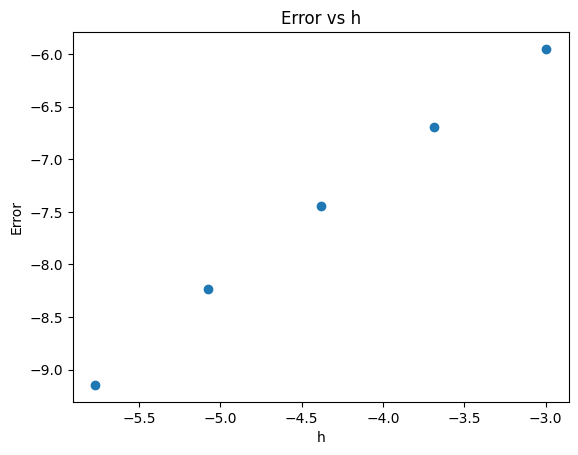

In [50]:
#do a logarithmic graph h vs errors
plt.scatter(np.log(h), np.log(errors_runge_kutta - true_theta_2), label='Runge-Kutta')

plt.xlabel('h')
plt.ylabel('Error')
plt.title('Error vs h')
#plot a vertical line
